<a href="https://colab.research.google.com/github/suranimayur/Advance-Seaborn-for-Data-Visualization-End-to-End-Implementation-Guide-Template/blob/main/CNN_MNIST_Dataset_End_to_End_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds

## Downloading and Preprocessing Data

In [9]:
BUFFER_SIZE= 70_000
BATCH_SIZE = 128
NUM_EPOCHS = 20

In [17]:
mnist_dataset,mnist_info = tfds.load(name="mnist",with_info=True,as_supervised=True)

It contains training and testing data

In [18]:
mnist_train,mnist_test = mnist_dataset["train"], mnist_dataset["test"]

Create Function scale to normalize image

In [19]:
def scale(image,label):
  image = tf.cast(image,tf.float32)
  image /= 255.0

  return image, label

In [46]:
train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

In [47]:
num_validation_samples = 0.1 * mnist_info.splits["train"].num_examples
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

In [48]:
num_test_samples = mnist_info.splits["test"].num_examples
num_test_samples = tf.cast(num_test_samples,tf.int64)

In [49]:
train_and_validation_data = train_and_validation_data.shuffle(BUFFER_SIZE)

In [50]:
train_data = train_and_validation_data.skip(num_validation_samples)
validation_data = train_and_validation_data.take(num_validation_samples)



In [51]:
train_data = train_data.batch(BATCH_SIZE)
validation_data= validation_data.batch(num_validation_samples)

test_data = test_data.batch(num_test_samples)

## Creating Model and Training it

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50,5,activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(50,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)

])

In [53]:
model.summary(line_length=75)

Model: "sequential_1"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d_5 (Conv2D)               (None, 24, 24, 50)            1300        
                                                                           
 max_pooling2d_3 (MaxPooling2D)  (None, 12, 12, 50)            0           
                                                                           
 conv2d_6 (Conv2D)               (None, 10, 10, 50)            22550       
                                                                           
 max_pooling2d_4 (MaxPooling2D)  (None, 5, 5, 50)              0           
                                                                           
 flatten_1 (Flatten)             (None, 1250)                  0           
                                                                           
 dense_1 (Dense)                 (None, 10)                    125

In [54]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [55]:
model.compile(optimizer="adam",
              loss= loss_fn,
              metrics=["accuracy"])

In [56]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    mode="auto",
    min_delta= 0,
    patience = 2,
    verbose =0,
    restore_best_weights=True

)

In [57]:
model.fit(
    train_data,
    epochs= NUM_EPOCHS,
    callbacks=[early_stopping],
    validation_data= validation_data,
    verbose=2
)

Epoch 1/20
422/422 - 69s - loss: 0.2662 - accuracy: 0.9261 - val_loss: 0.0880 - val_accuracy: 0.9740 - 69s/epoch - 163ms/step
Epoch 2/20
422/422 - 64s - loss: 0.0672 - accuracy: 0.9799 - val_loss: 0.0485 - val_accuracy: 0.9848 - 64s/epoch - 152ms/step
Epoch 3/20
422/422 - 64s - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0405 - val_accuracy: 0.9873 - 64s/epoch - 151ms/step
Epoch 4/20
422/422 - 65s - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0452 - val_accuracy: 0.9867 - 65s/epoch - 153ms/step
Epoch 5/20
422/422 - 64s - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0272 - val_accuracy: 0.9907 - 64s/epoch - 151ms/step
Epoch 6/20
422/422 - 65s - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0228 - val_accuracy: 0.9920 - 65s/epoch - 153ms/step
Epoch 7/20
422/422 - 63s - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0187 - val_accuracy: 0.9943 - 63s/epoch - 149ms/step
Epoch 8/20
422/422 - 62s - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0206 - val_accuracy: 0.9943 - 62s/epoch - 148

## Testing our Model

In [58]:
## Testing our model

test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 8s 8s/step - loss: 0.0259 - accuracy: 0.9911


In [66]:
## Print the test results

print("Test Loss    : {0: .4f}. \nTest Accuracy: {1: .2f}%".format(test_loss,test_accuracy*100))

Test Loss    :  0.0259. 
Test Accuracy:  99.11%


## Ploting Image and results

In [76]:
import matplotlib.pyplot as plt
import numpy

In [70]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [87]:
from sqlalchemy.sql.expression import label
## Split the test data into 2 arrays , containing image and corrosponding labels

for images, labels in test_data.take(1):
  images_test = images.numpy()
  labels_test = labels.numpy()


## Reshape the images into 28*28 form

image_plot = np.reshape(images_test,(10000,28,28))

## Image to Display

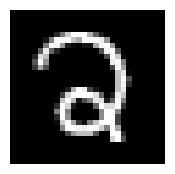

Label : 2


In [97]:
i = 856


#plot image

plt.figure(figsize=(2,2))
plt.axis("off")
plt.imshow(image_plot[i-1],cmap="gray",aspect="auto")
plt.show()


#print the correct labels for image

print("Label : {}".format(labels_test[i-1]))

## Obtain Model's Prediction

1/1 [==============================] - 0s 28ms/step


<BarContainer object of 10 artists>

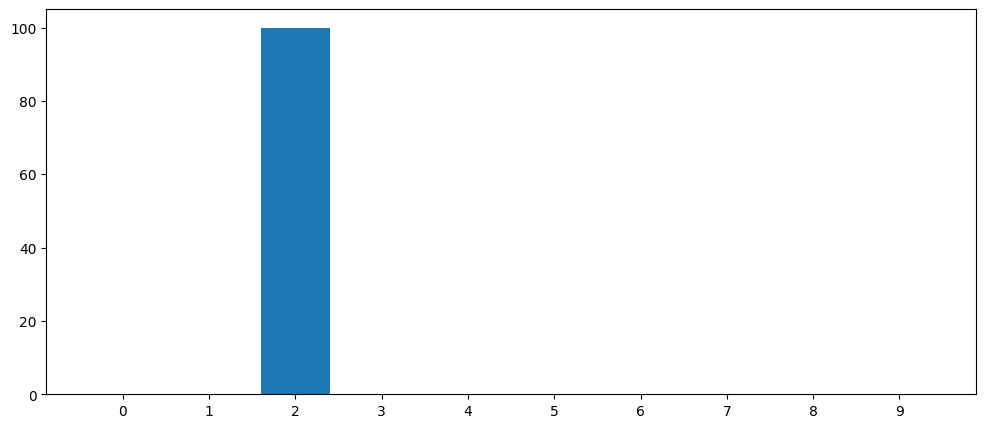

In [98]:
predictions = model.predict(images_test[i-1:i])


# Convert those predictions into probabilities

probabilities = tf.nn.softmax(predictions).numpy()

# Convert Probabilities into percentages
probabilities = probabilities*100


## Create a bar chart to plot this probabilities for each class

plt.figure(figsize=(12,5))
plt.bar(x=[1,2,3,4,5,6,7,8,9,10],
        height=probabilities[0],
        tick_label =[i for i in range(0,10)]
        )